<a href="https://colab.research.google.com/github/maa1and/maa1and/blob/main/ISC104_week6_271021_Mana_Asano.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

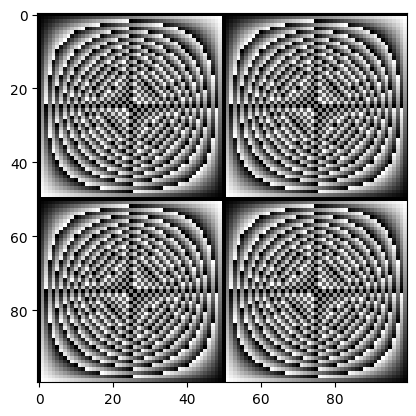

In [ ]:
#EX6_1 行をx、列をyとし、(x*y)%50の結果から描画する
import matplotlib.pyplot as plt
imglist = []
size = 100
for y in range(size):
  xlist = []
  for x in range(size):
    val = (x*y) % 50
    xlist.append(val)
  imglist.append(xlist)
plt.imshow(imglist,cmap="gray")

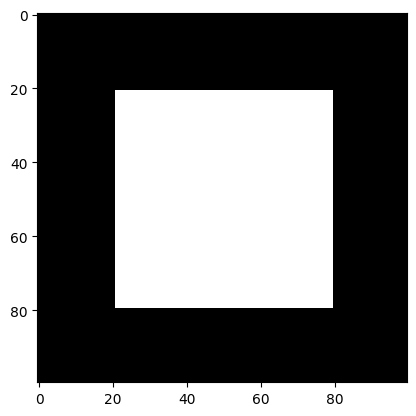

In [ ]:
#EX6_2 100x100の黒い正方形のうち、20< x,y <80の範囲は白く塗りつぶす
import matplotlib.pyplot as plt
size = 100
grid = []
for y in range(size):
  xlist = []
  for x in range(size):
    if 20 < x < 80 and 20 < y < 80: #条件に合うとき白＝1
      val = 1
    else:
      val = 0 #黒=0
    xlist.append(val)
  grid.append(xlist)
plt.imshow(grid, cmap="gray")
#見本と同じ出力結果になることを確認

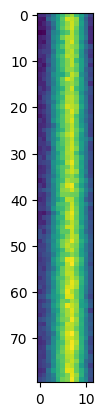

In [ ]:
#EX6_3 80年分の毎月の平均気温のデータから描画する
import matplotlib.pyplot as plt
f = open("/TokyoTemp1941-2020.csv","r")
templist = []
content = f.read()
temp = content.splitlines() #1年=1行なので行ごとに区切る
for i in temp: #以下は1年で1ループ
  monthly_data = i.split(",") #12個のデータをカンマで区切る
  month_temps = []
  for value in monthly_data:
    month_temps.append(float(value)) #floatに変換してmonth_tempsに格納
  templist.append(month_temps)
f.close()
plt.imshow(templist)

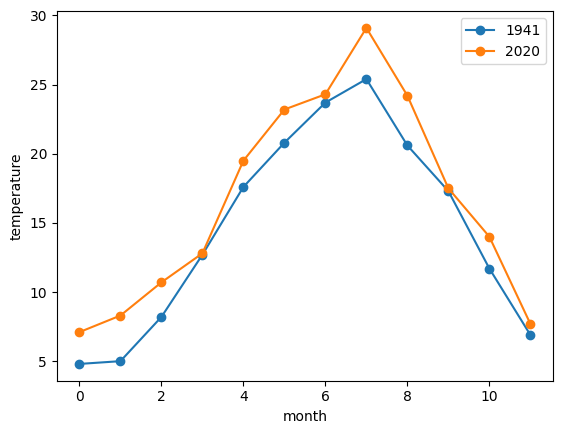

In [ ]:
#EX6_4 1941年と2020年の平均気温の折れ線グラフを描画する
temps_1941 = templist[0] #1941年の毎月の平均気温リスト
temps_2020 = templist[79] #2020年の毎月の平均気温リスト
plt.plot(temps_1941, label='1941', marker='o')
plt.plot(temps_2020, label='2020', marker='o')
plt.xlabel("month")
plt.ylabel("temperature")
plt.legend() #凡例
plt.show()

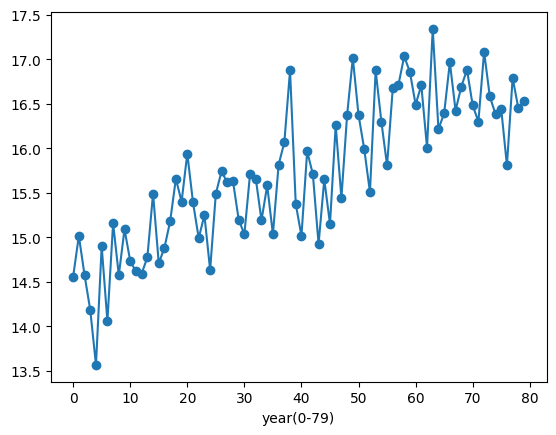

In [ ]:
#EX6_5a 各年の1年通しての平均気温から折れ線グラフを描画する
annual_temps = []
for i in templist:
  annual_average = sum(i) / 12
  annual_temps.append(annual_average) #print(annual_temps)で最初の3年分の平均気温が自分で計算したものと一致することを確認
plt.plot(annual_temps, marker='o')
plt.xlabel("year(0-79)")
plt.show()

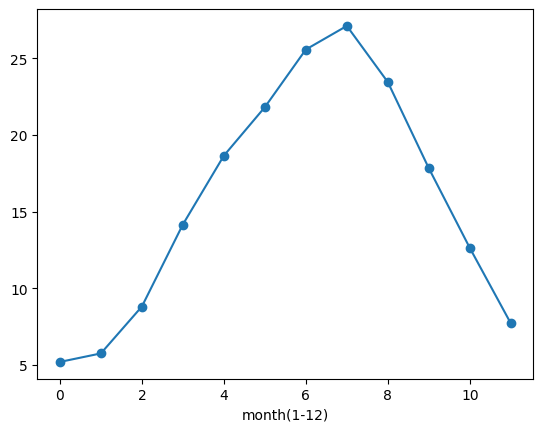

In [ ]:
#EX6_5b 80年分の各月の平均気温から折れ線グラフを描画する
month_avelist = []
for i in range(12): #以下はひと月で1ループ
  month_ave = []
  for k in templist:
    month_ave.append(k[i])
  month_avelist.append(sum(month_ave)/80) #80年分の平均を出す
plt.plot(month_avelist, marker='o')
plt.xlabel("month(1-12)")
plt.show()

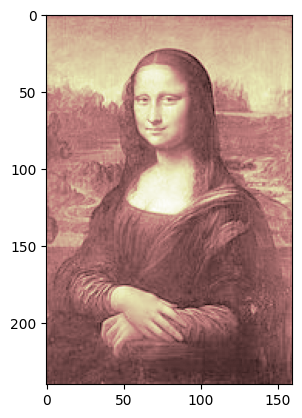

In [ ]:
#EX6_6 数値データを読み込んで画像を描画
import matplotlib.pyplot as plt
f = open("/240x160data.csv","r")
imglist = []
content = f.read()
img = content.splitlines() #行区切り
for i in img: #以下はEX6_3同様、1行につき1ループ
  img_data = i.split(",")
  img_list = []
  for value in img_data:
    img_list.append(float(value))
  imglist.append(img_list)
f.close()
plt.imshow(imglist, cmap="pink")
#モナリザが表示されることを確認

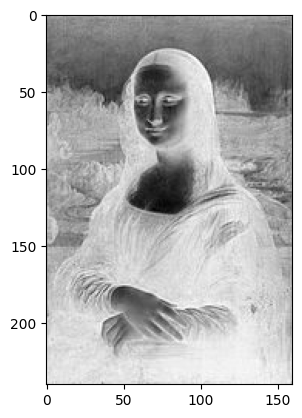

In [ ]:
#EX6_7 データ内の全ての数値xを1-xに変更する
for i in range(len(imglist)): #縦の長さ=240
  for k in range(len(imglist[i])): #横の長さ=160
    x = imglist[i][k] #imglistのi番目のリストのk番目の要素をxとする
    imglist[i][k] = 1 - x
plt.imshow(imglist, cmap="gray")
#モナリザが怖くなった

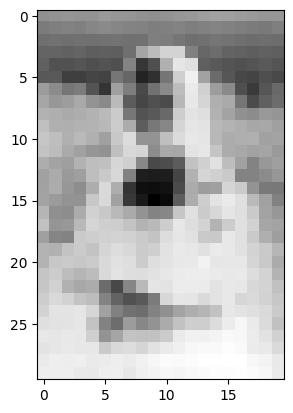

In [ ]:
#EX6_8 画像を8x8の正方形に分け、それぞれの数値の平均をとって描画する
newimglist = []
for i in range(0, 240, 8): #240まで8ずつ
    newimg_data = []
    for j in range(0, 160, 8): #160まで8ずつ
        square = 0 #正方形に含まれる数値の合計
        for m in range(8): #以下一つの正方形につき1ループ
            for n in range(8):
                square += imglist[i + m][j + n]
        square_average = square / 64
        newimg_data.append(square_average)
    newimglist.append(newimg_data)
plt.imshow(newimglist, cmap="gray")
#画像が粗くなることを確認
#forが4回も続くので、もっと簡潔にしたい

In [ ]:
#EX6_9 numpyを使ってコードから音楽を再生する
import numpy as np
import IPython.display as ipd

C = 261.63 #コードに対応する周波数。辞書にしたほうがいいかも
D = 293.66
E = 329.63
F = 349.23
G = 392.00
A = 440.00
B = 493.88
R = 0.0

rate = 48000
bpm = 60

qn_duration = bpm / 60

melody = [C,C,G,G,A,A,G,R,F,F,E,E,D,D,C] #演奏したい曲のコード
music = np.array([]) #最終的に再生するリスト

t = np.linspace(0.0, qn_duration, int(rate * qn_duration)) #時間軸の設定はネットにあったコードを参考にした
for i in melody:
  f = i
  music = np.append(music, np.sin(2 * np.pi * f * t))
ipd.Audio(music, rate = rate, autoplay = True)
#ABCソングが再生された